### Sales Analysis

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 

### Merge 12 Months of Data

In [2]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
len(df)

18383

In [4]:
df.shape

(18383, 6)

In [5]:
files = [file for file in os.listdir('./Sales_Data')]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [6]:
# Reading all files and merge in a single data frame

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("Sales_Data/"+ file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

In [7]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Read in update DataFrame

In [8]:
months_data = pd.read_csv('all_data.csv')

In [9]:
len(months_data), len(all_months_data)

(186850, 186850)

In [11]:
for col in months_data.columns:
    print(col)

Order ID
Product
Quantity Ordered
Price Each
Order Date
Purchase Address


### Clean up  the Data

### Finding & Droping the Nan Data

In [12]:
nan_df  = months_data[months_data.isna().any(axis=1)]

In [13]:
len(nan_df)

545

In [14]:
months_data = months_data.dropna(how ='all')

In [2]:
len(months_data)

### Finding 'Or 'and delete it 

In [16]:
temp_df = months_data[months_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
months_data = months_data[months_data['Order Date'].str[0:2] != 'Or']
months_data[8:12]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"
11,176567,Google Phone,1,600,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001"
12,176568,Lightning Charging Cable,1,14.95,04/15/19 12:18,"438 Elm St, Seattle, WA 98101"


In [18]:
months_data['Order Date'].str[:-5].head()

0    04/19/19 
2    04/07/19 
3    04/12/19 
4    04/12/19 
5    04/30/19 
Name: Order Date, dtype: object

In [82]:
# temp_df = months_data[months_data['Order Date'].str[0:2] == 'Or']
# len(temp_df)

### Convert columns to correct data type

In [19]:
months_data['Quantity Ordered'] = pd.to_numeric(months_data['Quantity Ordered'])

In [20]:
months_data['Price Each'] = pd.to_numeric(months_data['Price Each'])

### Add a sales column

In [21]:
months_data['Quantity Ordered'] = months_data['Quantity Ordered'].map(int)

In [22]:
months_data['Sales'] = months_data['Quantity Ordered'] * months_data['Price Each']

In [23]:
months_data[['Quantity Ordered', 'Price Each', 'Sales']].head()

,Quantity Ordered,Price Each,Sales
0,2,11.95,23.90
2,1,99.99,99.99
3,1,600.00,600.00
4,1,11.99,11.99
5,1,11.99,11.99


### Augment Data with additional columns

### Add Month Column

In [24]:
months_data['Month'] = months_data['Order Date'].str[0:2].map(int)

In [25]:
months_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantiry Ordered,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2,23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1,99.99,4


### What was the best month for sale ??

In [26]:
months_data.groupby('Month').sum().head()

,Quantity Ordered,Price Each,Quantiry Ordered,Sales
Month,,,,
1,10903,1.811768e+06,10903,1.822257e+06
2,13449,2.188885e+06,13449,2.202022e+06
3,17005,2.791208e+06,17005,2.807100e+06
4,20558,3.367671e+06,20558,3.390670e+06
5,18667,3.135125e+06,18667,3.152607e+06


In [27]:
len(months_data)

185950

### Add city column to the month data 

In [28]:
# function to get city
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [36]:
# Let use .apply()
months_data['City'] = months_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 

In [37]:
months_data['Purchase Address'].head(2)

0         917 1st St, Dallas, TX 75001
2    682 Chestnut St, Boston, MA 02215
Name: Purchase Address, dtype: object

In [38]:
months_data[['Purchase Address', 'City']].head(2)

,Purchase Address,City
0,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,"682 Chestnut St, Boston, MA 02215",Boston (MA)


### what city have the highest number of sales

In [39]:
city_result = months_data.groupby('City').sum()

In [40]:
city_result

,Quantity Ordered,Price Each,Quantiry Ordered,Sales,Month
City,,,,,
Atlanta (GA),16602,2.779908e+06,16602,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,11153,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,22528,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,16730,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,33289,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,27932,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,2750,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,11303,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,50239,8.262204e+06,315520


In [42]:
cities = months_data['City'].unique()

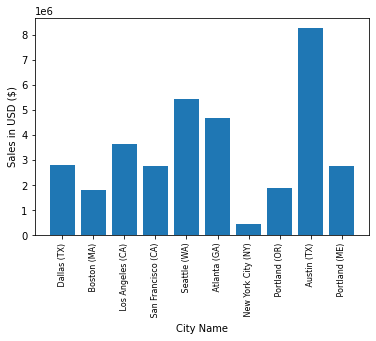

In [43]:
plt.bar(cities, city_result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### what time should we display advertisment to maximize liklihood of customer's buying product ?

In [44]:
# to convert the Order Date column to datetime format 
months_data['Order Date'] = pd.to_datetime(months_data['Order Date'])

In [102]:
# months_data.head()

In [45]:
months_data['Hour'] = months_data['Order Date'].dt.hour

In [46]:
months_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantiry Ordered,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2,23.90,4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1,99.99,4,Boston (MA),22


In [48]:
len(months_data)

185950

In [49]:
months_data.shape

(185950, 11)